__Проверка гипотез по увеличению выручки в интернет-магазине — оценка результатов A/B теста__

## Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

## Цель исследования
С помощью фреймворков ICE и RICE приоритизировать гипотезы, проанализировать результаты A/B теста и принять решение о необходимости остановки или продолжения теста.


## Задачи исследования:

**Подготовительная часть. Загрузка и предобработка данных:**
- загрузить и изучить данные
- изменить типы данных в случае необходимости
- проверить на наличие пропусков
- проверить на наличие дубликатов
- проверить тестируемые группы на уникальность пользователей (пользователи не должны попасть в обе группы)

**Часть 1. Приоритизация гипотез.**
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста**
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Проанализировать A/B-тест:
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его.

## Описание данных

Файл /datasets/hypothesis.csv
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv.
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Загрузка и предобработка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt

In [2]:
# считываем данные из файлов csv и сохраняем в переменные
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [3]:
# ознакомимся с данными
pd.options.display.max_colwidth = 130
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
# приведем названия колонок к удобному единому стилю
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [5]:
# посмотрим типы данных
display(hypothesis.info())
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [6]:
# изменим типы данных в колонках с датой
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [7]:
# проверим даты в таблицах на консистентность
display(orders['date'].min())
display(orders['date'].max())

display(visitors['date'].min())
display(visitors['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

в обоих датафреймах собраны данные за август 2019 года.

In [8]:
# проверим наличие пропусков
display(hypothesis.isna().mean())
display(orders.isna().mean())
display(visitors.isna().mean())

hypothesis    0.0
reach         0.0
impact        0.0
confidence    0.0
efforts       0.0
dtype: float64

transaction_id    0.0
visitor_id        0.0
date              0.0
revenue           0.0
group             0.0
dtype: float64

date        0.0
group       0.0
visitors    0.0
dtype: float64

In [9]:
# проверим наличие дубликатов
display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

Пропусков и дубликатов нет. Типы данных приведены к соответсвующим. Можно приступать к анализу.

In [10]:
# проверим, есть ли пользователи, которые попали в обе группы

a_buyers = orders[orders['group'] == 'A']['visitor_id'].unique()
b_buyers = orders[orders['group'] == 'B']['visitor_id'].unique()

len(set(a_buyers).intersection(b_buyers))

58

В данных о продажах по какой-то причине оказались 58 пользователей, которые попали как в тестируемую, так и в контрольную группу.

Чтобы не искажать результаты теста, удалим их. Поскольку наша задача - сравнить группы между собой по разным показателям и статистически измерить различия, а не вычислить абсолютные значения, то удаление не должно повлиять на результаты теста.

In [11]:
# вынесем id таких пользователей в отдельную переменную
error_users = set(a_buyers).intersection(b_buyers)

In [12]:
# доля пользователей, попавших в обе группы
len(error_users) / orders.visitor_id.nunique()

0.05625606207565471

In [13]:
# теперь удалим покупки этих пользователей из таблицы orders
orders = orders[~orders['visitor_id'].isin(error_users)]

Данные подготовлены к анализу

## Часть 1. Приоритизация гипотез.

In [14]:
# посмотрим все гипотезы и их параметры
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### Фреймворк ICE

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач.

В фреймворке ICE используется шкала от 1 до 10 чтобы все факторы сбалансированно влияли на итоговый бал.

In [15]:
# добавим колонку с расчетом ICE для гипотез в датафрейме
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)

In [16]:
hypothesis.sort_values('ice', ascending=False).head()

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00


#### Фреймворк RICE

Фреймворк RICE в отличие от ICE состоит из четырёх компонент:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

In [17]:
# добавим к расчетам reach и получим значения RICE для гипотез
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [18]:
hypothesis.sort_values('rice', ascending=False).head()

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


При использовании фреймворка ICE самыми приоритетными гипотезами являются: запуск акции со скидкой, добавление двух каналов привлечения и новая форма подписки.

Однако с учетом охвата пользователей (параметр 'reach'), т.е. используя фреймворк RICE, ситуация иная и наибольший приоритет у гипотезы с добавлением формы подписки (гипотеза с индексом 7). Это связано с тем, что данная гипотеза охватывает максимальное количество пользователей среди всех предложенных гипотез, в то время как лидер фреймфорка ICE - гипотеза с запуском акции со скидкой - имеет наименьший охват пользователей.

## Часть 2. Анализ A/B-теста

In [19]:
# Построить график кумулятивной выручки по группам. Сделать выводы и предположения.


In [20]:
# зададим функцию, которая будем агрегировать все необходимые для анализа данные

def get_cumulative_data(orders, visitors):

    # составим массив уникальных пар значений дат и групп теста
    dates_groups = orders[['date','group']].drop_duplicates().sort_values('date')

    # создадим датафрейм с кумулятивными данными о заказах

    orders_aggregated = dates_groups.apply(
        lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                .agg({ 'date': 'max',
                        'group': 'max',
                        'transaction_id': 'nunique',
                        'visitor_id': 'nunique',
                        'revenue': 'sum' }), axis=1
    ).sort_values(by=['date', 'group'])

    # и по аналогии о посетителях

    visitors_aggregated = dates_groups.apply(
        lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                .agg({'date' : 'max',
                      'group' : 'max',
                      'visitors' : 'sum'}), axis=1
    ).sort_values(by=['date','group'])

    # объединим данные с заказами, выручкой и пользователях в один датафрейм
    cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
    cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

    
    # агрегация данных для анализа среднего чека
    # кумулятивные данные о заказах и выручке групп А и B
    cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date','revenue', 'orders']]
    cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date','revenue', 'orders']]

    # собираем данные в одном датафрейме
    merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, on='date', how='left', suffixes=['_a', '_b'])
    
    
    # агрегация данных для анализа конверсии (среднего количества заказов на посетителя)
    # добавим значение кумулятивной конверсии
    cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
    
    # данные по конверсии по группам
    cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
    cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']
    
    # и отдельно игрегируем
    merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], on='date', how='left', suffixes=['_a', '_b'])
    
    
    return (cumulative_data,
            cumulative_data_a,
            cumulative_data_b,
            merged_cumulative_revenue,
            merged_cumulative_conversions)

In [21]:
# с помощью функции получим все необходимые датафреймы
(   cumulative_data,
    cumulative_data_a,
    cumulative_data_b,
    merged_cumulative_revenue,
    merged_cumulative_conversions) = get_cumulative_data(orders, visitors)

In [22]:
# посмотрим полученные датафреймы
cumulative_data_a.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
2,2019-08-02,A,42,36,234381,1338,0.031390
4,2019-08-03,A,66,60,346854,1845,0.035772
6,2019-08-04,A,77,71,388030,2562,0.030055
8,2019-08-05,A,99,92,474413,3318,0.029837


In [23]:
merged_cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


In [24]:
merged_cumulative_conversions.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


#### График кумулятивной выручки по группам

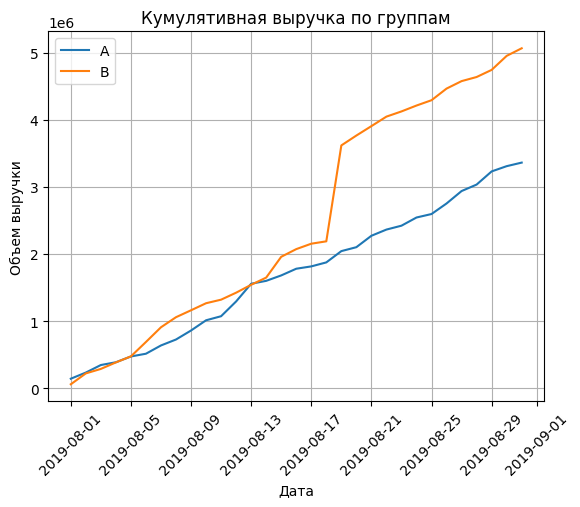

In [25]:
# теперь построим график кумулятивной выручки по группам

# Строим график выручки группы А
plt.plot(cumulative_data_a['date'], cumulative_data_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_data_b['date'], cumulative_data_b['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Объем выручки')
plt.grid()
plt.xticks(rotation=45)
plt.legend();

Выручка в обеих группах имеет равномерный рост, при этом выручка в группе B стабильно чуть выше, чем в группе A, а также имеет значительный импульс в середине теста, это может быть связано с резким ростом количества заказов, либо в эти даты произошли крупные покупки.

#### График кумулятивного среднего чека по группам

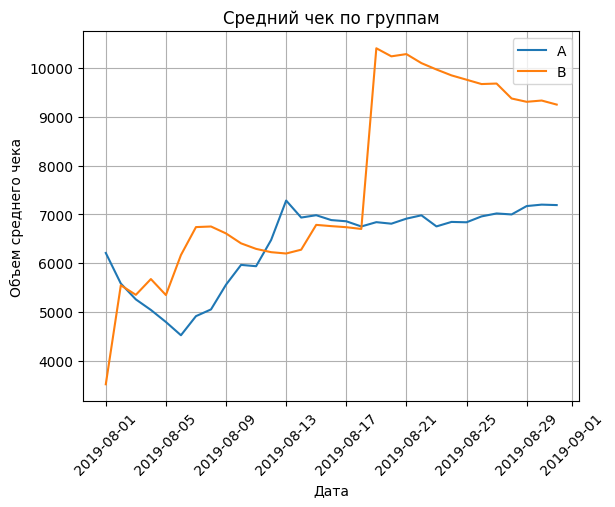

In [26]:
# построим графики кумудятивного среднего чека по группам

plt.plot(cumulative_data_a['date'], cumulative_data_a['revenue']/cumulative_data_a['orders'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['revenue']/cumulative_data_b['orders'], label='B')
plt.title('Средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Объем среднего чека')
plt.grid()
plt.xticks(rotation=45)
plt.legend();

На графике видим, что средний чек в разных группах имеет колебания и расхождения: к середине теста средний чек в группе А догнал показатели группы B и оказался выше, однако потом в группе B произошел резкий рост (около 30%), что обусловливает и рост кумулятивной выручки на предыдущем графике. Из-за наличия таких крупных заказов, попавших в группу B, графики не успели стабилизироваться и группа B продолжает лидировать, не смотря на снижение показателя к концу теста. Однако надо посмотреть на результаты теста без учета "выбросов" (аномальных заказов).

#### График относительного изменения кумулятивного среднего чека группы B к группе A.

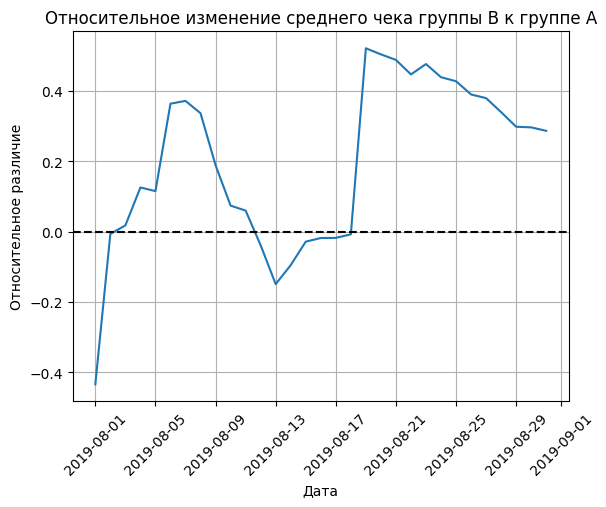

In [27]:
# поcтроим график отношения средних чеков

plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.grid()
plt.xticks(rotation=45);

На данном графике так же видно влияние крупных заказов, которые позволили после снижения среднего чека группы B к середине теста вырваться снова вперед.

#### График кумулятивного среднего количества заказов на посетителя по группам.

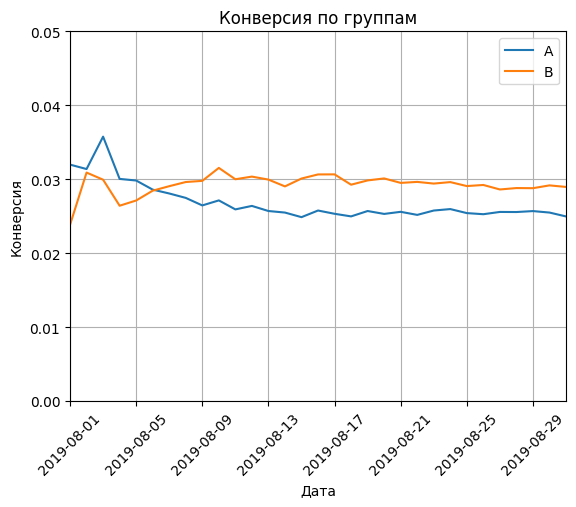

In [28]:
# строим график конверсии по группам
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label = 'A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label = 'B')
plt.legend()
plt.title('Конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.grid()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]);

Графики стабилизировались, сильных колебаний нет и хорошо заметно, что средняя конверсия группы B стабильно выше.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

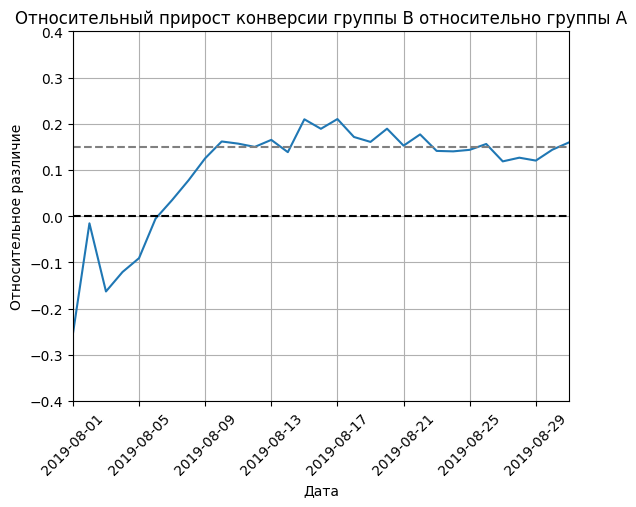

In [29]:
# построим график относительного изменения конверсии

plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversion_b']/merged_cumulative_conversions['conversion_a']-1)

plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.4, 0.4]);

Конверсия в группе B быстро опередила показатели группы A и далее на протяжении всего теста держится выше. При этом мы помним, что в группе B присутствуют аномалии, поэтому необходимо провести анализ без учета таких данных.

In [30]:
# создадим датафрейм с данными по количеству заказов для каждого пользователя

orders_by_users = (
    orders.groupby(['group', 'visitor_id'], as_index=False)
            .agg({'transaction_id':'nunique'})
            .rename(columns={'transaction_id':'total_orders'})
)

orders_by_users.sort_values('total_orders', ascending=False).head()

,group,visitor_id,total_orders
211,A,2108163459,3
409,A,3908431265,3
58,A,611059232,3
478,B,249864742,3
416,A,3967698036,3


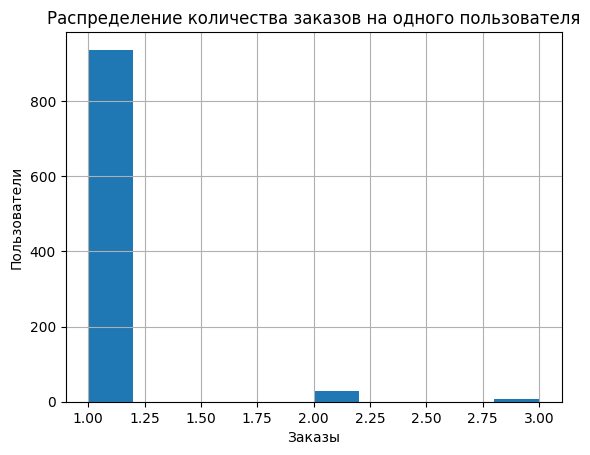

In [31]:
# посмотрим распределение
orders_by_users['total_orders'].plot(kind='hist', grid=True)
plt.title('Распределение количества заказов на одного пользователя')
plt.xlabel('Заказы')
plt.ylabel('Пользователи');

На графике видно, что подавляющее большинство пользователей совершают 1 заказ.

#### Точечный график количества заказов по пользователям.

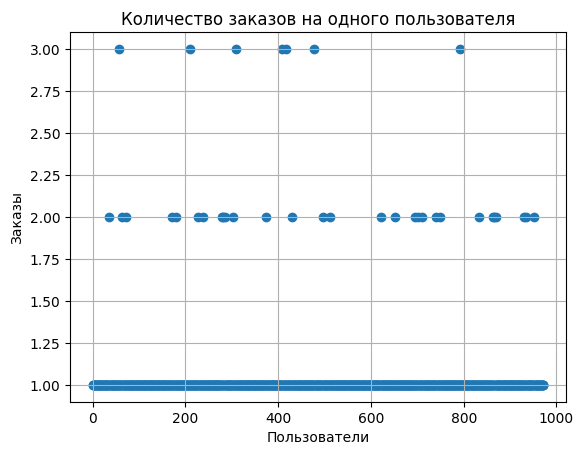

In [32]:
# построим точечную диаграмму количества заказов на пользователя
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['total_orders'])
plt.grid()
plt.title('Количество заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Заказы');

Так же как и график распределения, точечная диаграмма показывает, что больше всего пользователей совершали 1 покупку. Далее определим, какие показатели будем считать аномалиями и исключим из повторного анализа.

#### 95-й и 99-й перцентили количества заказов на пользователя.

In [33]:
# посчитаем 95 и 99 перцентили для количества заказов
np.percentile(orders_by_users['total_orders'], [95, 99])

array([1., 2.])

До 1% пользователей совершили больше 2 заказов, и до 5% пользователей - больше 1 заказа. Таким образом можно определить пороговое значение по 99 перцентилю, то есть далее исключим данные о пользователях, совершивших более двух заказов.

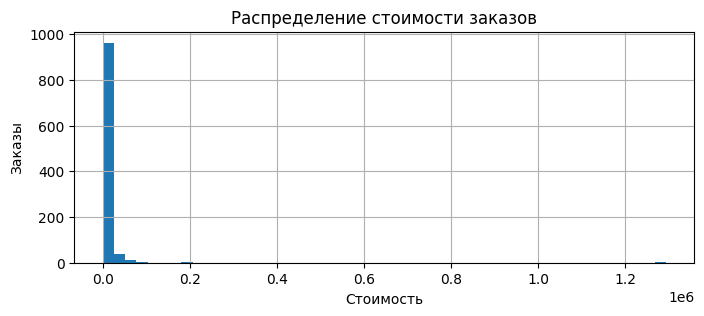

In [34]:
# изучим заказы по показатялям их стоимости. построим распределение
orders['revenue'].plot(kind='hist', grid=True, figsize=(8, 3), bins=50)
plt.title('Распределение стоимости заказов')
plt.xlabel('Стоимость')
plt.ylabel('Заказы');

В данных присутствуют значительные аномалии, например заказ стоимостью более 1.2 млн, при том, что почти все заказы находятся в диапазоне до 100 тыс.

#### Точечный график стоимостей заказов.

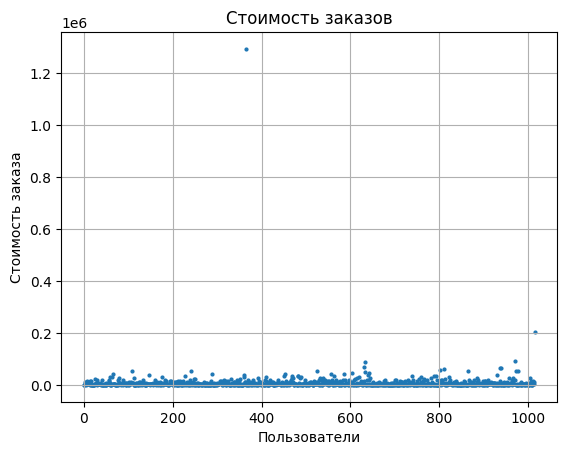

In [35]:
# и построим точечную диаграмму стоимости заказов
x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue'], s=4)
plt.grid()
plt.title('Стоимость заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа');

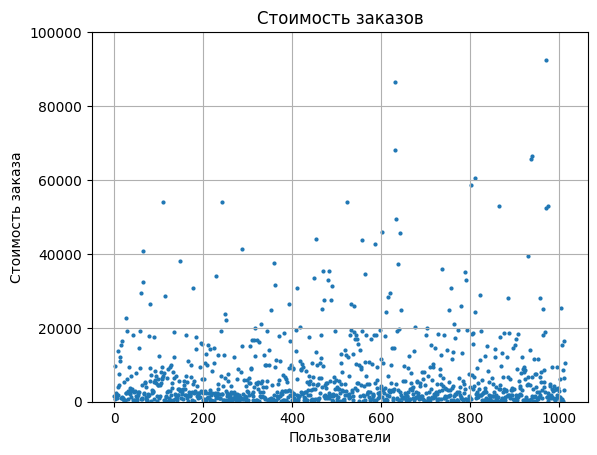

In [36]:
# посмотрим на этот же график в другом масштабе
x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue'], s=4)
plt.grid()
plt.ylim(0, 100000)
plt.title('Стоимость заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа');

На точечной диаграмме явными выбросами выглядят 2 заказа на уровне 200 тыс и около 1.25 млн. Посмотрим далее значения перцентилей.

#### 95-й и 99-й перцентили стоимости заказов.

In [37]:
# посчитаем 95 и 99 перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

До 5% пользователей осуществляют покупки стоимостью больше 26785, и до 1% пользователей тратят больше 53900 на одну покупку.

Таким образом можем обозначить пороговое значение для аномалий по 99 перцентилю.

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Для проверки статистической значимости сформулируем гипотезы:
- Нулевая гипотеза - различий в среднем количестве заказов на пользователя (конверсии) между группами нет
- Альтернативная гипотеза - средняя конверсия группы B отличается от конверсии группы A

In [38]:
# соберем таблицу со всеми данными в разрезе групп

# количество посетителей по дням
# группа A
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_day_a']

# группа B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_day_b']

In [39]:
# количество посетителей с накоплением по дням

# группа A
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_day_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# группа B
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_day_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

In [40]:
# количество заказов по дням и выручка

# группа A
orders_a_daily = (
    orders[orders['group'] == 'A'].groupby('date', as_index=False)
                                .agg({'transaction_id': 'nunique', 'revenue': 'sum'})
)

orders_a_daily.columns = ['date', 'orders_per_day_a', 'revenue_per_day_a']

# группа B
orders_b_daily = (
    orders[orders['group'] == 'B'].groupby('date', as_index=False)
                                .agg({'transaction_id': 'nunique', 'revenue': 'sum'})
)

orders_b_daily.columns = ['date', 'orders_per_day_b', 'revenue_per_day_b']

In [41]:
# количество заказов и выручку с накоплением для каждой группы возьмем из ранее сформированной таблицы с кумулятивными данными
# группа A
orders_a_cummulative = cumulative_data[cumulative_data['group'] == 'A'][['date', 'orders', 'revenue']]
orders_a_cummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']

# группа B
orders_b_cummulative = cumulative_data[cumulative_data['group'] == 'B'][['date', 'orders', 'revenue']]
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

In [42]:
# объединим все полученные данные в единый датафрейм
total_data = (
    orders_a_daily.merge(orders_b_daily, on='date', how='left')
                .merge(orders_a_cummulative, on='date', how='left')
                .merge(orders_b_cummulative, on='date', how='left')
                .merge(visitors_a_daily, on='date', how='left')
                .merge(visitors_b_daily, on='date', how='left')
                .merge(visitors_a_cummulative, on='date', how='left')
                .merge(visitors_b_cummulative, on='date', how='left')
)

In [43]:
# посмотрим, что получилось
total_data.head()

,date,orders_per_day_a,revenue_per_day_a,orders_per_day_b,revenue_per_day_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_day_a,visitors_per_day_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [44]:
# долее разделим по группам данные о количестве заказов на одного пользователя (сделаем срезы таблицы orders_by_users)
# группа A
orders_by_users_a = orders_by_users[orders_by_users['group'] == 'A'][['visitor_id', 'total_orders']]

# группа B
orders_by_users_b = orders_by_users[orders_by_users['group'] == 'B'][['visitor_id', 'total_orders']]

In [45]:
# Добавим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов.

sample_a = (
    pd.concat([orders_by_users_a['total_orders'],
               pd.Series(0, index=np.arange(total_data['visitors_per_day_a'].sum() - len(orders_by_users_a['total_orders'])))], axis=0)
)

sample_b = (
    pd.concat([orders_by_users_b['total_orders'],
               pd.Series(0, index=np.arange(total_data['visitors_per_day_b'].sum() - len(orders_by_users_b['total_orders'])))], axis=0)
)

In [46]:
# применим критерий Манна-Уитни для сравнения наших групп
st.mannwhitneyu(sample_a, sample_b).pvalue

0.011018084110014696

In [47]:
# относительная разница в количество заказов на посетителя
(sample_b.mean() / sample_a.mean() - 1)

0.1597977924896936

На сырых данных критерий Манна-Уитни показал статистически значимое различие между группами (p-value < 0.05), т.е. есть основания отвергнуть нулевую гипотезу. А относительная разница показателя среднего количества заказов на посетителя (конверсии) составила 15.9% в пользу группы B.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

По аналогии с конверсией сформулируем гипотезы для показателей среднего чека:
- Нулевая гипотеза - отличий в показателях между группами нет
- Альтернативная гипотеза - средний чек в группах отличается

In [48]:
# применим критерий Манна-Уитни для показателей среднего чека
st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue']).pvalue

0.8294908998149533

In [49]:
# и посмотрим относительную разницу
orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()-1

0.28660287636871096

В случае со средним чеком нет оснований отвергать нулевую гипотезу, p-value намного выше уровня значимости 0.05.

При этом относительная разница между показателями среднего чека в группах составляет 28.7% в пользу группы B, однако такое относительное различие не является статистически значимым, а значит получено случайно.

__Далее посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.__

Ранее мы определили пороговые значения для аномальных данных по 99 перцентилям:
- более 2 совершенных заказов для одного пользователя
- сумма заказа более 53,9 тыс

In [50]:
# вынесем id пользователей с аномальными данными в отдельную переменную

abnormal_users = pd.concat(
    [orders_by_users[orders_by_users['total_orders'] > np.percentile(orders_by_users['total_orders'], 99)]['visitor_id'],
    orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']],
    axis=0,
).drop_duplicates()

In [51]:
# посмотрим сколько всего таких пользователей
len(abnormal_users)

16

Всего 16 пользователей. Далее посмотрим, как изменятся результаты теста без их учета.

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [52]:
# отфильтруем данные в группах и сравним группы по конверсии
# группа A
clean_sample_a = pd.concat([
    orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))]['total_orders'],
    pd.Series(0, index=np.arange(total_data['visitors_per_day_a'].sum() - len(orders_by_users_a['total_orders']))
        )],
    axis=0
)

# группа B
clean_sample_b = pd.concat([
    orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))]['total_orders'],
    pd.Series(0, index=np.arange(total_data['visitors_per_day_b'].sum() - len(orders_by_users_b['total_orders']))
        )],
    axis=0
)

In [53]:
st.mannwhitneyu(clean_sample_a, clean_sample_b).pvalue

0.007021302207652193

In [54]:
clean_sample_b.mean()/clean_sample_a.mean() - 1

0.18920780766034584

На чистых данных статистически значимые различия по показателям среднего количества заказов на посетителя еще более выражены.

Средняя конверсия в группе B теперь на 18.9% выше, чем в группе A (разница до обработки аномалий была 15.9%).

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [55]:
# применим критерий Манна-Уитни к отфильтрованным данным и сравним показатели среднего чека
st.mannwhitneyu(
        orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users))
            )]['revenue'],
        orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users))
            )]['revenue'],
    ).pvalue

0.7877044862440841

In [56]:
# и посмотрим относительную разницу между показателями среднего чека в отфильтрованных группах
(
    orders[np.logical_and(orders['group'] == 'B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() /
    orders[np.logical_and(orders['group'] == 'A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() - 1
)

-0.0323351256932487

при сравнении показателей среднего чека p-value равен 0.78, т.е. группы почти идентичны.

Таким образом при сравнении групп по показателям:

Конверсия:
- на сырых данных p-value 0.011018084110014696
- после фильтрации p-value 0.007021302207652193

Средний чек
- на сырых данных p-value 0.8294908998149533
- после фильтрации p-value 0.7877044862440841

Мы видим, что избавление данных от аномальных значений усилило эффект для показателя конверсии, p-value стал еще ниже, то есть различие между группами стало еще более статистически значимым. Отклоняем нулевую гипотезу.

В то время как для показателей среднего чека между группами значение p-value почти не изменилось, значит различий между группами почти нет. Таким образом не можем отклонить нулевую гипотезу.

#### Графики после фильтрации данных

In [57]:
# применим фильтр к исходным данным 
filtered_orders = orders[~orders['visitor_id'].isin(abnormal_users)]

In [58]:
# подготовим фильтрованные данные для построения графиков
(
    clean_cumulative_data,
    clean_cumulative_data_a,
    clean_cumulative_data_b,
    clean_merged_cumulative_revenue,
    clean_merged_cumulative_conversions) = get_cumulative_data(filtered_orders, visitors)

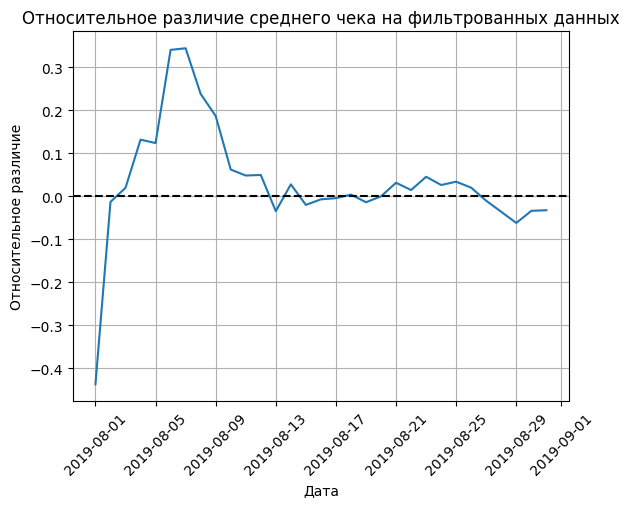

In [59]:
# поcтроим график отношения средних чеков после фильтрации данных
plt.plot(clean_merged_cumulative_revenue['date'], (clean_merged_cumulative_revenue['revenue_b']/clean_merged_cumulative_revenue['orders_b'])/(clean_merged_cumulative_revenue['revenue_a']/clean_merged_cumulative_revenue['orders_a'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное различие среднего чека на фильтрованных данных')
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.grid()
plt.xticks(rotation=45);

Теперь видно, с середины теста показатели среднего чека в группах сравнялись и держатся примерно на одном уровне.

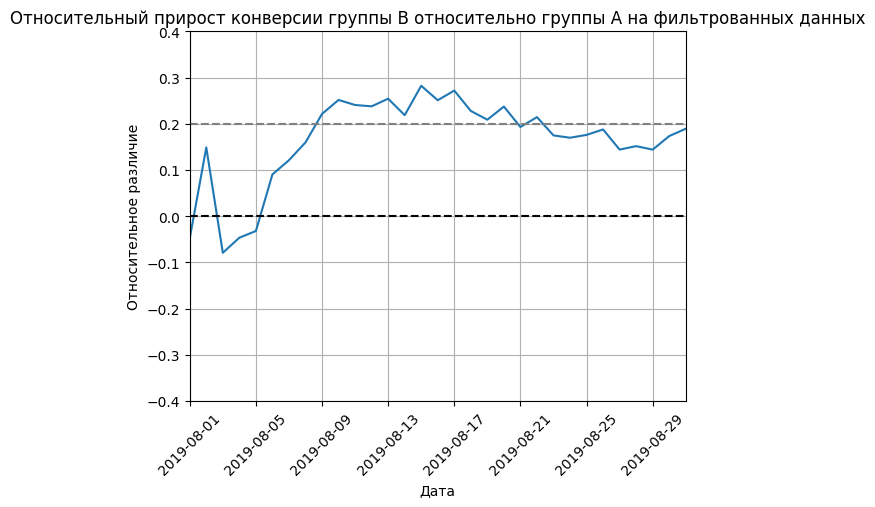

In [60]:
# построим график относительного прироста конверсии
plt.plot(clean_merged_cumulative_conversions['date'], clean_merged_cumulative_conversions['conversion_b']/clean_merged_cumulative_conversions['conversion_a']-1)

plt.title('Относительный прирост конверсии группы B относительно группы A на фильтрованных данных')
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.4, 0.4]);

По показателям конверсии группа B стабильно лучше, и эта разница (как показал критерий Манна-Уитни) статистически значима.

## Выводы и результаты:

В ходе исследования были загружены и обработаны данные, подготовлены к анализу.

В 1 части была проведена приоритизация гипотез с помощью фреймворков ICE и RICE. Наиболее приоритетной во фреймворке ICE является гипотеза о предоставлении скидок на товары, в то время как во фреймворке RICE - гипотеза о добавлении формы подписки. Таким образом, наглядно исследовано влияние параметра REACH - охвата пользователей.


Во 2 части был проведен A/B тест.
Были исследованы показатели конверсии и среднего чека в двух группах сначала на сырых данных, затем на обработанных:

- По показателям конверсии как на сырых данных, так на данных после фильтрации показатели группы B оказались лучше и эти различия в обоих случаях статистически значимы.

- После обработки данных и избавления от аномалий показатели среднего чека в группах сравнялись, при этом критерий Манна-Уитни не показывал статистически значимых различий между группами ни на сырых данных, ни после фильтрации.

Исходя из полученных результатов можно остановить тест и сделать вывод, что результатом эксперимента стало повышение конверсии в группе B.